In [ ]:
# 1.a in the preprocessing, i read the data into a dataframe for easier handling
import pandas as pd
import numpy as np
df_mobile_usage = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')
df_mobile_usage.head()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1.b. use pd.shape to get the shape of our dataframe
print(df_mobile_usage.shape)

(548, 11)


There are 548 users (data records) and each has 11 corresponding features

2. Data Rela1onship/Distribution:
#### a. Provide a Frequency table and an appropriate plot to visualize Pickup counts
#### split by gender.
#### b. Provide a Frequency table and at least 2 different types of plots to visualize the
#### distribution of Daily average minutes.
#### c. Provide at least 2 appropriate plots (for each) to check the relationship between
#### the
#### i. Participant’s age and their Response time on singleton visual search
#### ii. Participant’s gender and their Response time on conjunction visual
#### search

In [ ]:
import matplotlib.pyplot as plt

# replace empty strings and spaces with NaN
# regular expression (regex)
df_mobile_usage = df_mobile_usage.replace(r'^\s*$', pd.NA, regex=True)

# convert all columns to numeric
df_mobile_usage = df_mobile_usage.apply(pd.to_numeric, errors='coerce')


Pickup Counts

In [ ]:
# split pick up data into gender splits
pick_up_1 = df_mobile_usage['DailyAvePickups'][df_mobile_usage["GenderNum"] == 1]
pick_up_2 = df_mobile_usage['DailyAvePickups'][df_mobile_usage["GenderNum"] == 2]
pick_up_3 = df_mobile_usage['DailyAvePickups'][df_mobile_usage["GenderNum"] == 3]

Text(0, 0.5, 'Number of users')

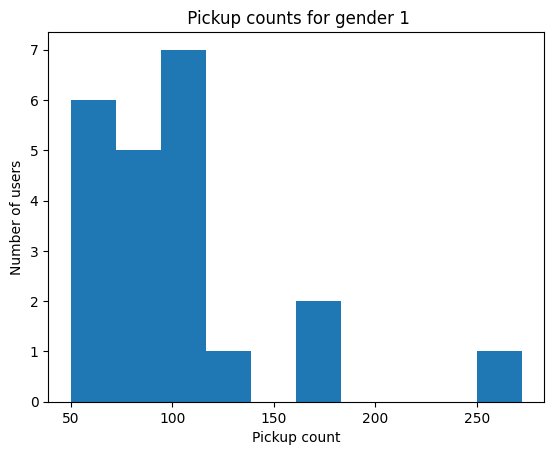

In [ ]:
# histogram 1 for gender 1
plt.hist(pick_up_1)
plt.title(" Pickup counts for gender 1")
plt.xlabel("Pickup count")
plt.ylabel("Number of users")

Text(0, 0.5, 'Number of users')

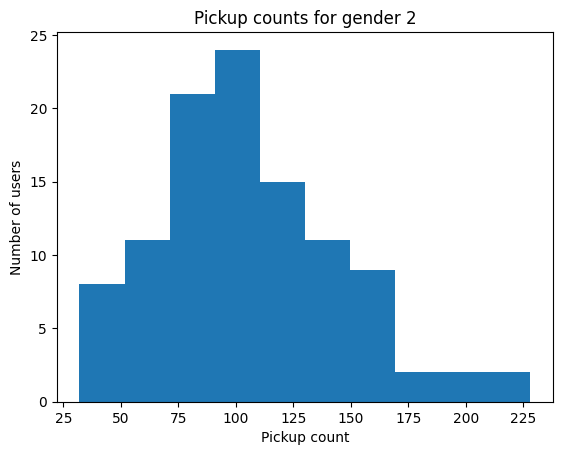

In [ ]:
# histogram 2 for gender 2

plt.hist(pick_up_2)
plt.title("Pickup counts for gender 2")
plt.xlabel("Pickup count")
plt.ylabel("Number of users")

Text(0, 0.5, 'Number of users')

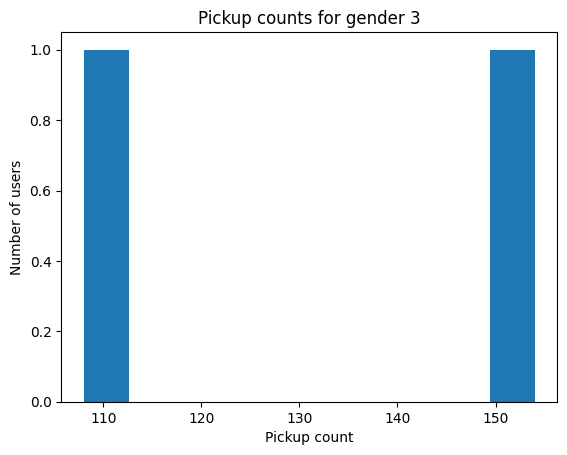

In [ ]:
# histogram for gender 3

plt.hist(pick_up_3)
plt.title("Pickup counts for gender 3")
plt.xlabel("Pickup count")
plt.ylabel("Number of users")

Daily average minutes

In [ ]:
# declare avg minutes variables

avg_min_1 = df_mobile_usage['DailyAvgMins'][df_mobile_usage['GenderNum'] == 1]
avg_min_2 = df_mobile_usage['DailyAvgMins'][df_mobile_usage['GenderNum'] == 2]
avg_min_3 = df_mobile_usage['DailyAvgMins'][df_mobile_usage['GenderNum'] == 3]

Text(0, 0.5, 'Number of users')

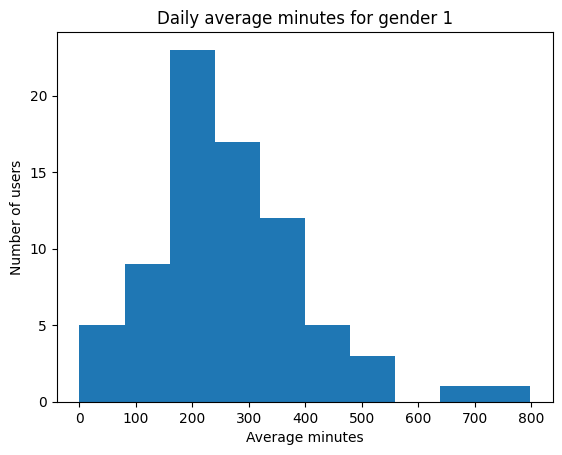

In [ ]:
# hist for gender 1 avg minutes

plt.hist(avg_min_1)
plt.title("Daily average minutes for gender 1")
plt.xlabel("Average minutes")
plt.ylabel("Number of users")

In [ ]:
# # stacked bar plot for all 3 gender avg minutes

# fig, ax = plt.subplots()
# plt.title("Daily average minutes for gender 1")
# plt.xlabel("Average minutes")
# plt.ylabel("Number of users")
# plt.show()

Text(0, 0.5, 'Number of users')

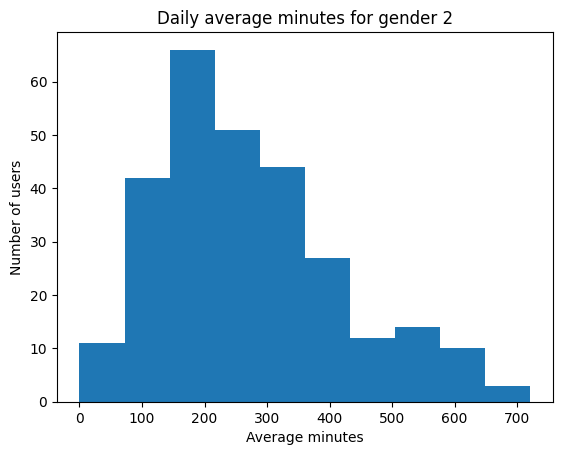

In [ ]:
# hist for gender 2 avg minutes

plt.hist(avg_min_2)
plt.title("Daily average minutes for gender 2")
plt.xlabel("Average minutes")
plt.ylabel("Number of users")

Text(0, 0.5, 'Number of users')

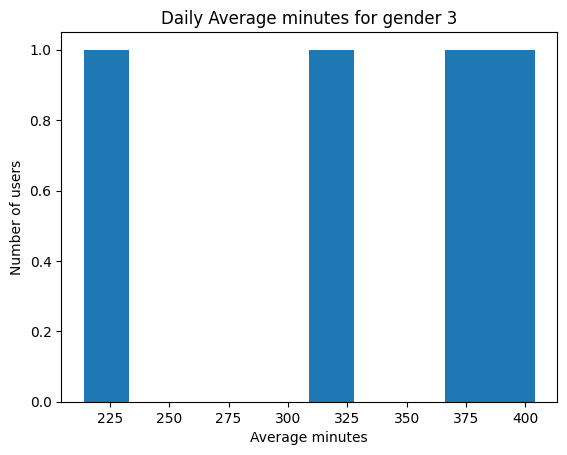

In [ ]:
# hist for gender 3 avg min

plt.hist(avg_min_3)
plt.title("Daily Average minutes for gender 3")
plt.xlabel("Average minutes")
plt.ylabel("Number of users")

Text(0, 0.5, 'user counts')

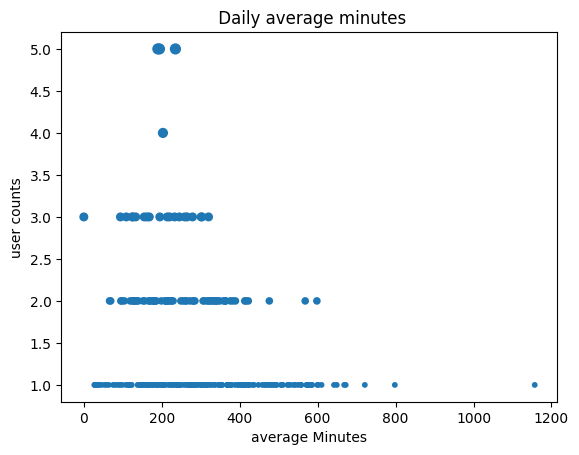

In [ ]:
## scatter plot

# drop NaN values from column
data = df_mobile_usage['DailyAvgMins'].dropna()

# count frequency of each value
frequency = data.value_counts()

# create scatter plot
plt.figure()
plt.scatter(frequency.index, frequency.values, s=frequency.values*10)  # Adjust the scale factor (10) as needed
plt.title (" Daily average minutes")
plt.xlabel("average Minutes")
plt.ylabel("user counts")

#### c. Provide at least 2 appropriate plots (for each) to check the relationship between
#### the
#### i. Participant’s age and their Response time on singleton visual search
#### ii. Participant’s gender and their Response time on conjunction visual
#### search


In [ ]:
df_mobile_usage.columns

Index(['Year', 'Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total',
       'Device', 'DailyAvgMins', 'DailyAvePickups',
       'VS_RT_correct_Conjunction', 'VS_RT_correct_Single'],
      dtype='object')

In [ ]:
vs_conjunction_gender_RT = df_mobile_usage[['GenderNum','VS_RT_correct_Conjunction']]
vs_conjunction_gender_RT = vs_conjunction_gender_RT.dropna()

Text(0, 0.5, 'RT Conjunction VS ')

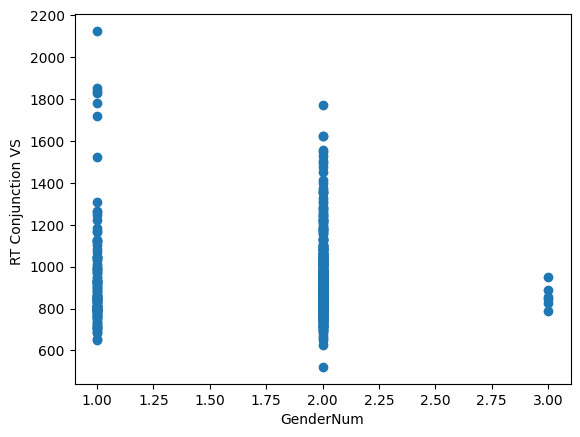

In [ ]:
plt.scatter(vs_conjunction_gender_RT['GenderNum'],vs_conjunction_gender_RT['VS_RT_correct_Conjunction'])
plt.xlabel ("GenderNum")
plt.ylabel("RT Conjunction VS ")

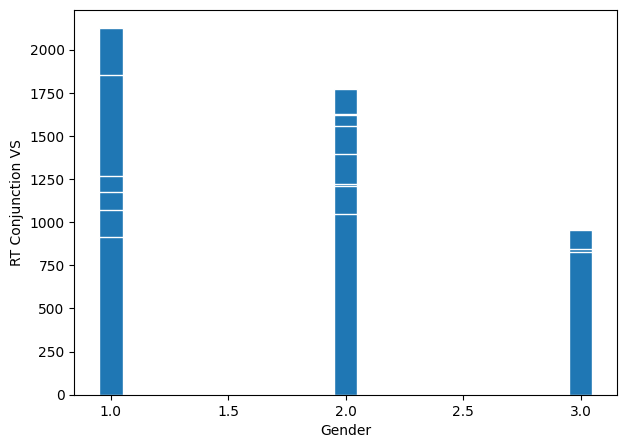

In [ ]:
# plot bars style
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.bar(vs_conjunction_gender_RT['GenderNum'], vs_conjunction_gender_RT['VS_RT_correct_Conjunction'], width=0.1, edgecolor="white", linewidth=1)
ax.set_xlabel("Gender")
ax.set_ylabel("RT Conjunction VS")
plt.show()

#### 3. Correlation Check: Produce a bivariate correlation table between Age, STAI,BRIEF_Total, DailyAvgMins and VS_RT_correct_Single.


In [ ]:
df_mobile_usage

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,NaN,2.0,4.0,49.0,70.0,NaN,NaN,NaN,1178.700000,1216.387500
1,2021,37.0,2.0,8.0,44.0,33.0,NaN,NaN,NaN,946.470000,785.597500
2,2022,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1182.741667,950.900000
3,2022,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1778.950000,984.333333
4,2022,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38.0,1.0,3.0,56.0,39.0,NaN,507.0,NaN,915.785917,747.883194
544,2020,27.0,2.0,5.0,64.0,77.0,NaN,267.0,NaN,877.783333,720.729583
545,2020,36.0,2.0,2.0,46.0,43.0,NaN,610.0,NaN,1211.483333,1049.979167
546,2020,31.0,2.0,4.0,67.0,69.0,NaN,558.0,NaN,899.774583,845.612083


In [ ]:
import scipy.stats as stats
dictionary = {}

columns = ['Age', 'STAI','BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']

for i, x in enumerate(columns):
    for j, y in enumerate(columns[i+1:]):

        df = df_mobile_usage[[x,y]]
        df = df.dropna()

        correlation, p_value = stats.pearsonr(df[x],df[y])
        dictionary[x+ " , " +y] = correlation

In [ ]:
dictionary

{'Age , STAI': -0.11702061945907277,
 'Age , BRIEF_Total': -0.0749858044940985,
 'Age , DailyAvgMins': -0.14920364269352493,
 'Age , VS_RT_correct_Single': 0.31938038089142184,
 'STAI , BRIEF_Total': 0.6306912443027092,
 'STAI , DailyAvgMins': 0.025333097948654185,
 'STAI , VS_RT_correct_Single': -0.09348910715440376,
 'BRIEF_Total , DailyAvgMins': 0.09892874683348858,
 'BRIEF_Total , VS_RT_correct_Single': 0.001566350929453682,
 'DailyAvgMins , VS_RT_correct_Single': -0.039009679680634325}

4. Linear Regression: Perform a linear regression to see if DailyAvgMins predicts VS_RT_correct_Single

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = df_mobile_usage[['DailyAvgMins','VS_RT_correct_Single']]
df = df.dropna()

In [ ]:
df


,DailyAvgMins,VS_RT_correct_Single
7,259.0,1524.733333
8,475.0,1263.913333
9,155.0,604.390000
12,305.0,662.885417
13,210.0,869.622500
...,...,...
543,507.0,747.883194
544,267.0,720.729583
545,610.0,1049.979167
546,558.0,845.612083


In [ ]:
X = df[['DailyAvgMins']]
y = df[['VS_RT_correct_Single']]

In [ ]:
X

,DailyAvgMins
7,259.0
8,475.0
9,155.0
12,305.0
13,210.0
...,...
543,507.0
544,267.0
545,610.0
546,558.0


In [ ]:
y

,VS_RT_correct_Single
7,1524.733333
8,1263.913333
9,604.390000
12,662.885417
13,869.622500
...,...
543,747.883194
544,720.729583
545,1049.979167
546,845.612083


In [ ]:
print(X.shape, y.shape)

(365, 1) (365, 1)


In [ ]:
# create a linear regression model
lin_reg = LinearRegression()

# fit model to training data
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X)

In [ ]:
accuracy = lin_reg.score(X, y)
accuracy

0.0015217551087856052

## muliple Regression: add predictors Age, GenderNum, STAI, BRIEF_Total and DailyAvgPickups to the multiple regression model.


In [ ]:
df_mobile_usage.columns

Index(['Year', 'Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total',
       'Device', 'DailyAvgMins', 'DailyAvePickups',
       'VS_RT_correct_Conjunction', 'VS_RT_correct_Single'],
      dtype='object')

In [ ]:
df = df_mobile_usage[['DailyAvgMins','Age', 'GenderNum','STAI', 'BRIEF_Total', 'DailyAvePickups','VS_RT_correct_Single']]
df = df.dropna()
X = df [['DailyAvgMins','Age', 'GenderNum','STAI', 'BRIEF_Total', 'DailyAvePickups']]
y = df[['VS_RT_correct_Single']]

In [ ]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X)

In [ ]:
score_multi_features = lin_reg.score(X, y)
score_multi_features

0.21808814462541548

# 6. Scenario 1:
# a. Participants including male, female and non-binary from various age groups
# took part in a study which ran for a week.
# b. They were grouped under three Age Groups a&lt; =30 years, b: 31 to 49 years,
# and c &gt;= 50 years
# c. And then their mobile usage was monitored, and the daily average minutes of
# usage was recorded.

# d. And the usage (average minutes per day) was grouped under three Usage
# Groups a =&lt; 300 minutes, b= b: 301 to 899 minutes, or c &gt;= 900 minutes
# e. Then they were asked to locate target red apple amongst distractors of only
# blue apples (known as Singleton search) and Mean time to identify was
# recorded (reaction time; RT)
# Perform the following based on the Scenario 1:
# f.

# Create any groups described above and choose appropriate Omnibus test
# statistic for Scenario 1 to test the hypothesis stated below:
#
# i. Hypothesis: The researcher hypothesised that as participant mobile phone use increased,
# the time taken for them to find the search target would decrease in singleton search, with the greatest decrease in
# participants less than 30 years-of-age.
#  ii. Justify reasons for choosing the test.
#  iii. List the details of assumptions and the corresponding statistic test deployed to achieve it (in a markdown cell) (Example assumptions (but not limited to) may be Normality, Variance, Linearity etc.,)
#  iv. Check validity of those assumptions and provide appropriate visual  charts.
# Note: If there are deviations, apply methods of rectification before the
# test is applied on the dataset
#  v. Use appropriate follow-on tests to identify where the specific effects lie (e.g. between which IV levels or combination of levels).

## Age Groups:
### Group A: ≤ 30 years
### Group B: 31 to 49 years
### Group C: ≥ 50 years
## Usage Groups:
### Group 1: ≤ 300 minutes/day
### Group 2: 301 to 899 minutes/day
### Group 3: ≥ 900 minutes/day


Choosing a test: For this scenario, a two-way ANOVA (Analysis of Variance) seems appropriate as we have two independent variables (age group and mobile usage) and one dependent variable (time taken to find the search target).


## ii. The goal is to predict how quick can someone solve the VS task given his age and his screen time average. This hypothesis takes an assumption how the RT would interact based on the age and the screen time   

## List the details of assumptions and the corresponding statistic test
# deployed to achieve it (in a markdown cell) (Example assumptions (but
# not limited to) may be Normality, Variance, Linearity etc.,)
1. Features have be normally distributed
2. Observations are independent
3. Homogeneity of Variances: The variances among groups should be similar


In [ ]:
# df = df_mobile_usage[['DailyAvgMins','Age','VS_RT_correct_Single']]
df = df.dropna()
max(df['VS_RT_correct_Single'].unique())

1524.73333329459

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of      DailyAvgMins   Age  GenderNum  STAI  BRIEF_Total  DailyAvePickups  \
7           259.0  31.0        2.0  43.0         44.0             54.0   
8           475.0  33.0        2.0  51.0         24.0            112.0   
9           155.0  27.0        1.0  32.0          4.0             97.0   
12          305.0  19.0        2.0  53.0         81.0            120.0   
13          210.0  20.0        2.0  36.0         47.0            105.0   
..            ...   ...        ...   ...          ...              ...   
471         104.0  31.0        1.0  39.0         23.0             69.0   
473         415.0  41.0        2.0  40.0         41.0            123.0   
477         215.0  30.0        2.0  46.0         55.0            154.0   
482         568.0  20.0        2.0  45.0         16.0            127.0   
487          99.0  62.0        2.0  20.0         20.0             40.0   

     VS_RT_correct_Single  
7             1524.733333  
8             1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

1. the observations are roughly normal for different age groups
2. variance is roughly homogeneous among the groups


In [ ]:
# homogeneity of variances: Levene's Test
levene_test = stats.levene(df[df['AgeGroup'] == 'A']['VS_RT_correct_Single'],
                           df[df['AgeGroup'] == 'B']['VS_RT_correct_Single'],
                           df[df['AgeGroup'] == 'C']['VS_RT_correct_Single'])
print("Levene's Test:", levene_test)


KeyError: ignored

In [ ]:
# two-way ANOVA
model = ols('VS_RT_correct_Single ~ C(AgeGroup) * C(UsageGroup)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


PatsyError: ignored